In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
nba_data = pd.read_csv("../Resources/cleaned_df.csv")

In [3]:
nba_data.head()

,YEAR,PLAYER,TEAM,SALARY,AGE,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
0,2015,Stephen Curry,Golden State Warriors,11370786,28,79,71,8,34.2,30.1,...,6.7,3.3,2.1,0.2,2.0,50.3,15,2,12.9,61
1,2015,Shaun Livingston,Golden State Warriors,5543725,30,78,69,9,19.5,6.3,...,3.0,1.0,0.7,0.3,1.8,15.6,0,0,2.7,132
2,2015,Marreese Speights,Golden State Warriors,3815000,28,72,64,8,11.6,7.1,...,0.8,0.9,0.3,0.5,1.6,13.7,1,0,0.2,183
3,2015,Leandro Barbosa,Golden State Warriors,2500000,33,68,60,8,15.9,6.4,...,1.2,0.8,0.6,0.1,1.6,11.8,0,0,0.6,243
4,2015,Klay Thompson,Golden State Warriors,15501000,26,80,71,9,33.3,22.1,...,2.1,1.7,0.8,0.6,1.9,32.2,0,0,10.5,31


In [4]:
kings_cleansed = nba_data.loc[nba_data['TEAM']== 'Sacramento Kings']
kings_cleansed

,YEAR,PLAYER,TEAM,SALARY,AGE,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
26,2016,Matt Barnes,Sacramento Kings,242224,37,20,16,4,20.5,5.7,...,2.3,1.2,0.6,0.5,2.4,16.5,0,0,1.7,560
225,2015,Willie Cauley-Stein,Sacramento Kings,3398280,22,66,26,40,21.4,7.0,...,0.6,0.7,0.7,1.0,2.2,18.7,3,0,-1.2,197
226,2015,Seth Curry,Sacramento Kings,947276,25,44,17,27,15.7,6.8,...,1.5,0.8,0.5,0.1,0.9,11.6,1,0,-0.8,406
227,2015,Rudy Gay,Sacramento Kings,12403101,29,70,29,41,34.0,17.2,...,1.7,2.0,1.4,0.7,2.6,32.1,7,0,-1.2,52
228,2015,Rajon Rondo,Sacramento Kings,9500000,30,72,29,43,35.2,11.9,...,11.7,3.9,2.0,0.1,2.4,39.1,37,6,-2.1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2019,Nemanja Bjelica,Sacramento Kings,6825000,31,40,15,25,27.3,12.2,...,2.5,1.6,0.9,0.6,3.0,26.5,5,0,-1.3,184
300,2019,Richaun Holmes,Sacramento Kings,4767000,26,37,14,23,29.4,13.1,...,1.0,1.2,1.1,1.4,3.9,30.9,13,0,0.2,218
301,2019,Trevor Ariza,Sacramento Kings,12195122,34,31,12,19,24.9,6.1,...,1.5,0.9,1.1,0.2,2.0,17.1,0,0,-1.5,114
302,2019,Wenyen Gabriel,Sacramento Kings,1445697,22,11,2,9,5.6,1.7,...,0.3,0.5,0.3,0.2,0.6,4.1,0,0,-2.5,434


In [5]:
df_corr = kings_cleansed.corr()
df_corr.unstack().sort_values()
df_corr.head(15)

,YEAR,SALARY,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
YEAR,1.000000,0.147456,-0.154716,-0.273879,-0.209551,-0.304639,-0.101091,-0.024557,-0.011813,-0.030810,...,-0.049244,-0.061355,-0.116841,0.049457,0.080876,-0.041062,-0.150605,-0.194255,0.051532,-0.056460
SALARY,0.147456,1.000000,0.292608,0.183491,0.174378,0.179285,0.580905,0.524918,0.499700,0.503212,...,0.248825,0.399144,0.377258,0.229833,0.311745,0.507303,0.316447,0.160343,-0.032775,-0.819725
AGE,-0.154716,0.292608,1.000000,0.139539,0.131271,0.137317,0.219436,0.009042,-0.016104,0.014506,...,0.129616,0.017725,0.226196,-0.165919,0.072913,0.065835,-0.042005,0.055675,0.050041,-0.215540
GP,-0.273879,0.183491,0.139539,1.000000,0.952924,0.975184,0.519450,0.410675,0.444668,0.386011,...,0.311742,0.319786,0.397408,0.195816,0.371478,0.445606,0.348862,0.182099,-0.031036,-0.437506
W,-0.209551,0.174378,0.131271,0.952924,1.000000,0.862148,0.509335,0.419005,0.442322,0.391899,...,0.319777,0.313236,0.398667,0.216549,0.390168,0.459849,0.387873,0.190470,0.129374,-0.415610
L,-0.304639,0.179285,0.137317,0.975184,0.862148,1.000000,0.496090,0.380286,0.420062,0.358865,...,0.287424,0.305641,0.372967,0.169088,0.335844,0.408831,0.299728,0.165209,-0.146326,-0.427599
MIN,-0.101091,0.580905,0.219436,0.519450,0.509335,0.496090,1.000000,0.864329,0.862085,0.871719,...,0.625675,0.728024,0.779983,0.264923,0.605640,0.875777,0.472284,0.283798,-0.026345,-0.602697
PTS,-0.024557,0.524918,0.009042,0.410675,0.419005,0.380286,0.864329,1.000000,0.989157,0.980130,...,0.541463,0.838206,0.694611,0.430558,0.633679,0.945650,0.610249,0.248496,0.059459,-0.554373
FGM,-0.011813,0.499700,-0.016104,0.444668,0.442322,0.420062,0.862085,0.989157,1.000000,0.972646,...,0.527218,0.825007,0.688215,0.464431,0.667540,0.949401,0.614834,0.247840,0.024834,-0.560091
FGA,-0.030810,0.503212,0.014506,0.386011,0.391899,0.358865,0.871719,0.980130,0.972646,1.000000,...,0.557166,0.825864,0.706491,0.362138,0.613657,0.925873,0.567733,0.255711,-0.042020,-0.532948


In [6]:
df_corr.to_csv("sac_corr.csv", index=False, header=True)

The r-squared is: 0.5249177532503075


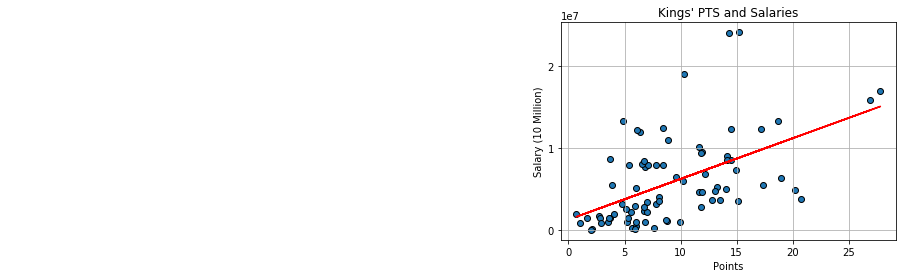

In [9]:
x_pts = kings_cleansed['PTS']
y_sal = kings_cleansed['SALARY']
plt.scatter(x_pts,y_sal,marker = 'o',edgecolors = 'black')
plt.title("Kings' PTS and Salaries")
plt.xlabel("Points")
plt.ylabel("Salary (10 Million)")
plt.grid()
plt.yticks(np.arange(0,50000000,10000000))
plt.xticks(np.arange(0,30,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_pts, y_sal)
regress_values = x_pts * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_pts,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

The r-squared is: 0.5144267345061662


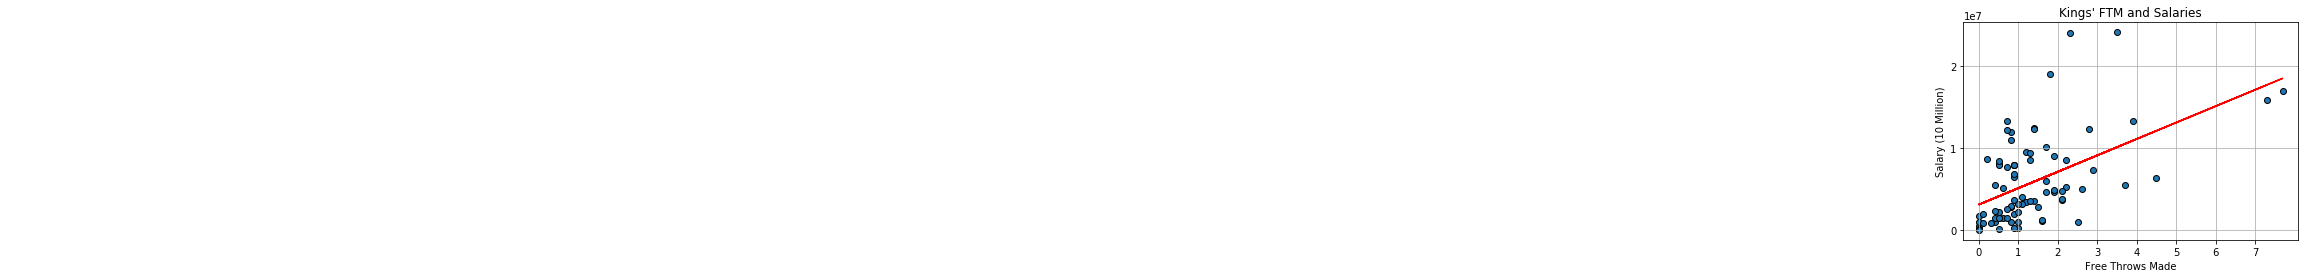

In [13]:
x_ftm = kings_cleansed['FTM']
y_sal = kings_cleansed['SALARY']
plt.scatter(x_ftm,y_sal,marker = 'o',edgecolors = 'black')
plt.title("Kings' FTM and Salaries")
plt.xlabel("Free Throws Made")
plt.ylabel("Salary (10 Million)")
plt.grid()
plt.yticks(np.arange(0,50000000,10000000))
plt.xticks(np.arange(0,8,1))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ftm, y_sal)
regress_values = x_ftm * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ftm,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")